## Validate Eigenvalue Analysis

In order to complete the analysis of the 5-vertex cross-in-plane graph, we needed to compute the eigenvalue branches of the matrix
\begin{align}
    \widetilde{M} :=
    \begin{pmatrix}
        \cos\frac{\omega}{2} & 0 & -1 \\
        0 & \cos\frac{\omega}{2} & -1 \\
        -1 & -1 & 2\cos\frac{\omega}{2} + \frac{\alpha\omega}{2}\sin\frac{\omega}{2}
    \end{pmatrix},
\end{align}
which we determined to be
\begin{align}
    \beta_1 &= \cos\frac{\omega}{2}, \\
    \beta_{\pm} &= 3\cos\frac{\omega}{2} + \frac{\alpha\omega}{4}\sin\frac{\omega}{2} \pm \frac{1}{2}\sqrt{8 + \left( \cos\frac{\omega}{2} + \frac{\alpha\omega}{2}\sin\frac{\omega}{2} \right)^2 }.
\end{align}
For $n$ odd, $\beta_{+}(2n\pi)=0$ whilst for $n$ even, $\beta_{-}(2n\pi)=0$ instead.
We then needed to determine whether, with
\begin{align}
    H^{(2)} = 2\omega\csc\frac{\omega}{2},
\end{align}
the limits
\begin{align}
    \lim_{\omega\rightarrow2n\pi} H^{(2)}\widetilde{\beta}_{-} &= -\frac{4\alpha\left(n\pi\right)^2}{3}, &\quad n \ \text{even}, \\
	\lim_{\omega\rightarrow2n\pi} H^{(2)}\widetilde{\beta}_{+} &= -\frac{4\alpha\left(n\pi\right)^2}{3}, &\quad n \ \text{odd},
\end{align}
were still $0$, which we believe they are not - but we should check that we have the right value for these limits!

The purpose of this notebook is to test whether both of these assertations are true - whether the eigenvalues of the matrix $\widetilde{M}$ are indeed those we computed for each $\omega$, and whether the limit value that we found is actually the value of the limit!

In [1]:
import numpy as np
from numpy import cos, sin, sqrt, pi
from numpy.linalg import eig

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

In [2]:
def M(w, alpha=-1.):
    '''
    Computes the value of the matrix \tilde{M}, for a scalar w
    '''
    
    M = np.diag([cos(w/2.), cos(w/2.), 2.*cos(w/2.) + alpha*w*sin(w/2.)/2.], k=0)
    M[0:2,2] = -1.0
    M[2,0:2] = -1.0
    
    return M

def betaPlus(w, alpha=-1.):
    '''
    Computes the value of the eigenvalue branch \beta_{+}, can take vector w
    '''
    
    beta = 3.*cos(w/2.)/2. + alpha*w*sin(w/2.)/4. + sqrt( 8 + (cos(w/2.) + alpha*w*sin(w/2.)/2.)**2 )/2.
    
    return beta

def betaMinus(w, alpha=-1.):
    '''
    Computes the value of the eigenvalue branch \beta_{+}, can take vector w
    '''
    
    beta = 3.*cos(w/2.)/2. + alpha*w*sin(w/2.)/4. - sqrt( 8 + (cos(w/2.) + alpha*w*sin(w/2.)/2.)**2 )/2.
    
    return beta

def H2(w):
    '''
    Computes the value of the function H^{(2)}, can take vector w
    '''
    
    H2 = -2. * w / sin(w/2.)
    
    return H2

def TheoryLimit(n, alpha=-1.):
    '''
    Returns the limit that we computed analytically for H2*beta_{\pm} as omega -> 2n\pi, for this value of n
    '''
    
    if n%2==0:
        limVal = -4. * (alpha / 3.) * (n * pi)**2
    else:
        limVal = -4. * (alpha / 3.) * (n * pi)**2
    return limVal

In [3]:
# check if eigenvalues coincide...?

alpha = -1.
omega = 2.5*pi

w, vecs = eig(M(omega, alpha))
b1 = cos(omega/2.)
bplus = betaPlus(omega, alpha)
bminus = betaMinus(omega, alpha)

print(w, b1, bplus, bminus)

[ 2.08014179 -0.70710678 -1.42466029] -0.7071067811865477 2.0801417864939236 -1.4246602937045882


/home/will/anaconda3/envs/PythonBasics/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


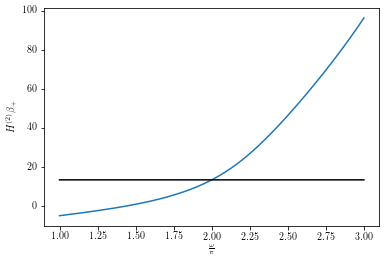

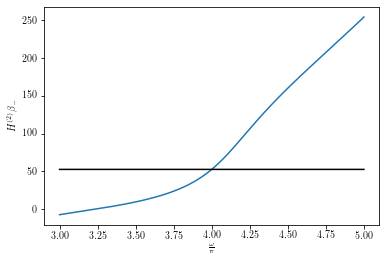

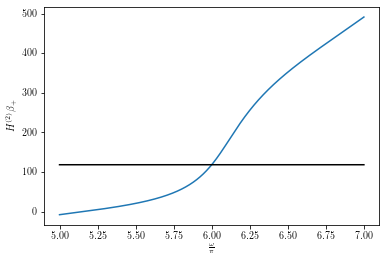

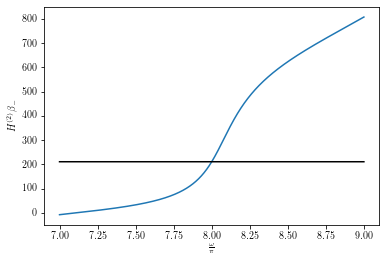

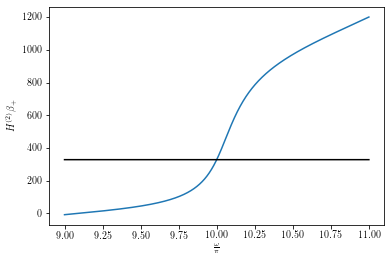

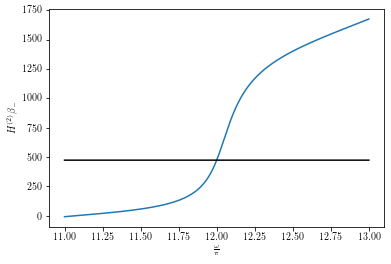

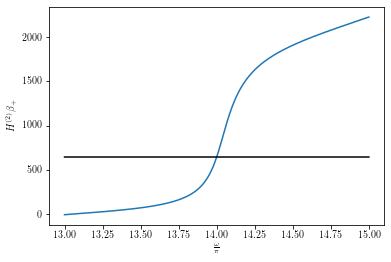

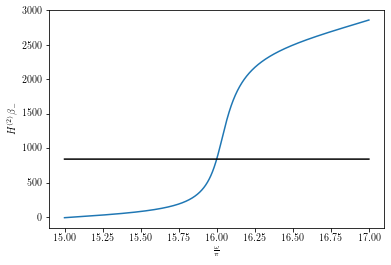

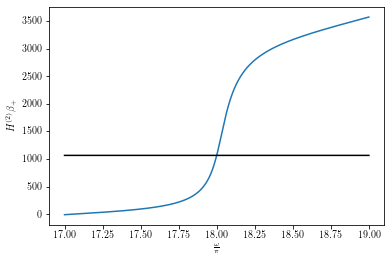

In [8]:
# first, let's numerically check the limits involving H2*beta_{\pm}...

nVals = list(range(10))[1:]
plotPts = 2000
alpha = -1.

for n in nVals:
    wRange = np.linspace((2*n-1)*pi, (2*n+1)*pi, plotPts)
    theoryVal = TheoryLimit(n, alpha)
    if n%2==0:
        # even n, uses beta_{-}
        limVals = H2(wRange) * betaMinus(wRange, alpha)
        #limVals = betaMinus(wRange, alpha)
    else:
        # odd n, uses beta_{+}
        limVals = H2(wRange) * betaPlus(wRange, alpha)
        #limVals = betaPlus(wRange, alpha)
    
    fig, ax = plt.subplots()
    ax.plot(wRange/pi, limVals)
    ax.set_xlabel(r'$\frac{\omega}{\pi}$')
    if n%2==0:
        ax.set_ylabel(r'$H^{(2)}\beta_{-}$')
    else:
        ax.set_ylabel(r'$H^{(2)}\beta_{+}$')
    #ax.set_ylim(theoryVal - 10, theoryVal + 10)
    ax.plot(wRange/pi, theoryVal * np.ones_like(wRange), 'black')
    fig.show()